# Neste notebook, serão apresentados conceitos sobre o Perceptron e, em seguida, um exemplo de aplicação, onde o Perceptron será usado para cálculo de funções lógicas elementares.

# 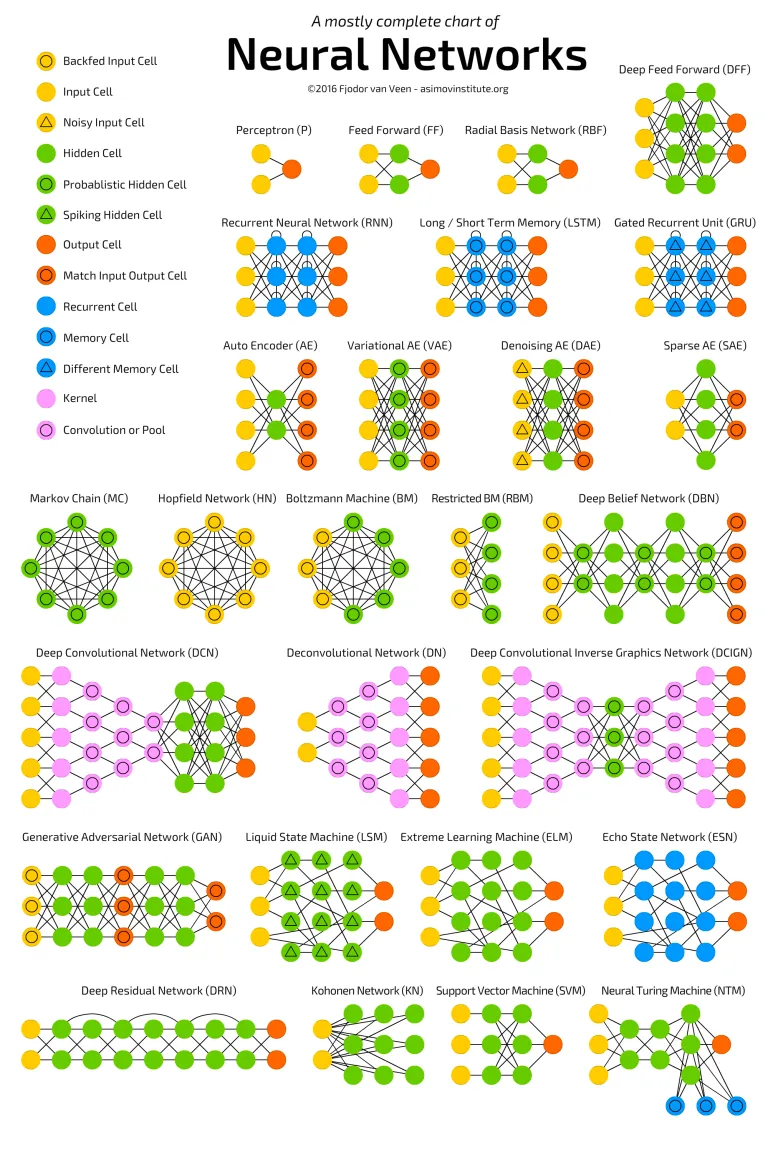
### Fonte: https://www.asimovinstitute.org/neural-network-zoo/

# As redes neurais são modelos computacionais que simulam a estrutura e o funcionamento do cérebro humano. Por meio de um conjunto de elementos de processamento muito simples (atuando como neurônios), altamente conectados e processando em paralelo, são capazes de reconhecer e classificar padrões.
# O neurônio biológico é constituído por 3 partes principais:
## - Dendritos: estruturas que recebem sinais elétricos de outros neurônios através das sinapses (transmissão de impulsos elétricos para outros neurônios).
## - Corpo celular (ou soma): estrutura que processa o sinal elétrico proveniente dos dendritos e envia o resultado ao axônio. Esse processamento consiste em ponderar os sinais recebidos dos dendritos.
## - Axônio: nessa estrutura, é verificado se os sinais são superiores a um limiar de disparo ou não. Em caso positivo, eles seguem pelo axônio, caso contrário, são bloqueados e não prosseguem, já que são considerados como irrelevantes.
# A memória consiste no peso associado a cada condutor (dendrito) e é responsável por amplificar ou atenuar um sinal, quando este está passando por um neurônio. Com isso, existe uma multiplicação do sinal por esse peso. Por meio da memorização, os valores dos pesos são estabelecidos a partir do treinamento recebido pelo cérebro durante a vida útil.
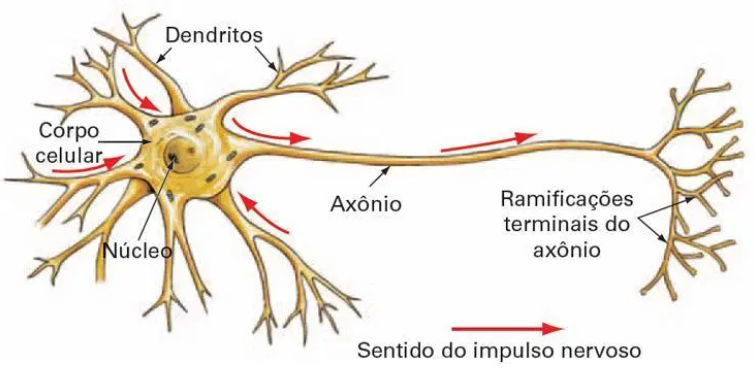
### Fonte: http://deeplearningbook.com.br/o-neuronio-biologico-e-matematico/

# Desenvolvido em 1958 por Frank Rosenblatt, o Perceptron é a rede neural de camada única mais simples que existe. É considerado um classificador linear (binário), uma vez que as duas classes envolvidas no problema devem ser linearmente separáveis.
## O perceptron consiste em um modelo matemático simples, que recebe várias entradas ($x_1, ..., x_m$) e produz uma única saída ($y$). Além disso, existem pesos ($w_1, ..., w_m$) associados à cada entrada corresponde, de modo a atribuir a devida importância a cada uma na produção da saída.
## Por meio de uma função de combinação, é feito uma soma ponderada das entradas com seus respectivos pesos. O resultado desse cálculo é a entrada para uma função de ativação (ou transferência), responsável por gerar uma saída esperada.
## A saída, que corresponde a 0 ou 1, é determinada pela comparação de um viés ( $b$, bias) com o resultado da função de combinação, como é mostrado a seguir:
$$ y = \left \{ \begin{matrix} 0, \text{se } \left [ \sum_{i=0}^{m}w_ix_i \right ] + b \le 0 \\ 1, \text{se } \left [ \sum_{i=0}^{m}w_ix_i \right ] + b> 0 \end{matrix} \right.	$$
## O viés, que corresponde a uma entrada do neurônio, aumenta o grau de liberdade da função de ativação e, dessa maneira, aumenta a capacidade de aproximação da rede. O viés pode ser visto como uma medida de quão fácil é fazer que o Perceptron dispare. Quando o viés é grande, é fácil que ele emita 1. Porém, quando o viés é muito negativo, é difícil que ele emita 1.

# O perceptron segue o modelo "feed-forward", já que as entradas são enviadas para o neurônio, processadas e produzem um resultado.
# Seu processo de treinamento consiste em ajustar os pesos, assim como o viés, com base no erro gerado pela comparação do valor esperado (ou seja, a aprendizagem é supervisionada) com o valor gerado. Dessa forma, seu processo de aprendizagem é por correção de erros, onde procura-se minimizar a diferença entre a soma ponderada das entradas pelos pesos e a saída desejada, da seguinte maneira:
$$ w(t+1) = w(t) + \eta.e(t).x(t) $$
## onde, $\eta$ é uma taxa de aprendizado, $e(t) = d(t) - y(t)$, $d$ o valor desejado e $y$, o obtido.
## Quando a rede converge, ou seja, o erro é zero para todos os elementos dos dados de treino, o processo de treinamento para.

# Por meio da função de ativação são feitas pequenas mudanças nos pesos e no viés para possibilitar o aprendizado do neurônio. Podemos dizer que ela faz uma transformação não linear nos dados de entrada, permitindo a execução de tarefas complexas. Em redes maiores, onde existem vários Perceptrons, ela é indispensável para a resolução de tarefas mais complexas. 

## No contexto de redes neurais existem algumas variações da função de ativação: Função de Etapa Binária, Linear, Sigmóide, Tanh, ReLU, Leaky ReLU, Softmax, etc. A escolha da função de ativação depende da natureza do problema.

# Uma vez que um único Perceptron consegue resolver somente funções linearmente separáveis (já que a função de combinação e ativação geram uma equação linear que separa as duas classes envolvidas no problema), para a solução de problemas complexos do mundo real, é necessário utilizar arquiteturas mais avançadas de redes neurais artificiais (várias camadas envolvidas), já que o Perceptron não consegue gerar um hiperplano para separar os dados.

# A seguir, será apresentada uma aplicação do Perceptron para o cálculo de funções lógicas elementares que são linearmente separáveis, como: AND, OR, NAND e NOR, apresentadas abaixo.
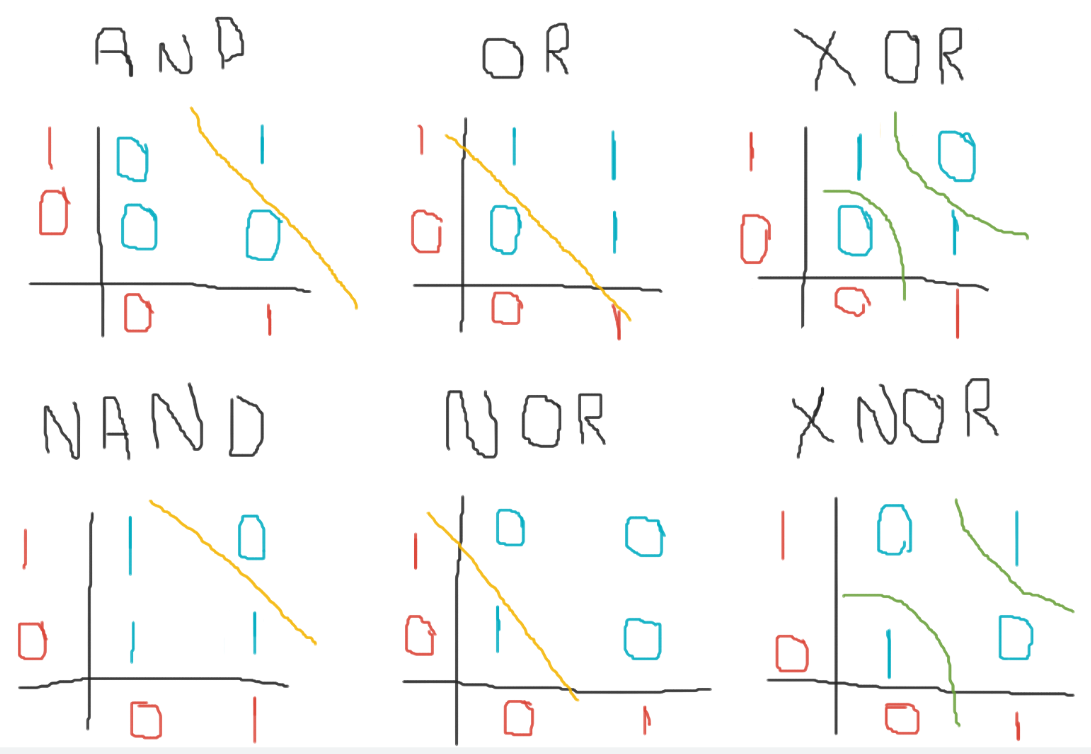
# Na imagem acima, os eixos são as entradas (em vermelho) que podem levar o valor 0 ou 1  e os números no gráfico (em azul) são a saída esperada. Como é possível traçar uma linha (em amarelo) para separar as duas saídas possíveis, um único Perceptron pode executar todas essas funções. Porém, o operador XOR e XNOR não é linearmente separável e não pode ser resolvido por um único Perceptron.

In [1]:
import numpy as np

### - Perceptron

In [2]:
class Perceptron:
    
    """Definindo a classe do Perceptron, cujos atributos são:
        - pesos: vetor de pesos, além do viés que é o primeiro elemento, são inicializados aleatóriamente
        - taxa_aprendizado: a taxa de aprendizado utilizada no ajuste dos pesos e viés"""
    
    def __init__(self, tamanho_entrada, taxa_aprendizado):
        self.pesos = np.zeros(tamanho_entrada + 1)
        self.taxa_aprendizado = taxa_aprendizado
    
    def prever(self, entrada): #Função de ativação (sinal)
        soma_ponderada = np.dot(entrada, self.pesos[1:]) + self.pesos[0]  #Calculando a soma ponderada (a primeira posição é o viés, b)
        if soma_ponderada > 0:
            return 1
        else:
            return 0
    
    def treinar(self, entradas, saidas): #Método para treinamento do Perceptron, onde são ajustados seus pesos
        iteracao = 1
        continua = True
        
        while continua: #Esse loop é feito até que o erro seja 0 para todos os elementos do conjunto de treinamento
            print("Iteração: ", iteracao)
            erros = []  #Inicializando uma lista de erros para verificar a convergência, no final da iteração
            
            for entrada, saida in zip(entradas, saidas):  #Iterando sobre cada par entrada/saida do conjunto de treinamento
                saida_obtida = self.prever(entrada) #Aplicando a função de ativação para a entrada de modo a obter uma suposta saída
                
                erro = saida - saida_obtida  #Calculando o erro do valor desejado com o obtido
                erros.append(erro) #Inserindo o erro em uma lista de erros
                
                self.pesos[1:] += self.taxa_aprendizado * erro * entrada #Atualizando o vetor de pesos seguindo a regra w(t+1) = w(t) + taxa_apend*erro*x(t)
                self.pesos[0] += self.taxa_aprendizado * erro  #Atualizando o viés
                
                print("   Erro: ", erro, " | Pesos: ", self.pesos)
                
            continua = False
            for erro in erros: #Verificando se existem erros diferentes de 0 para saber se o método convergiu ou não
                if erro != 0: #Ainda existem erros em algum conjunto de treinamento
                    continua = True #Então, ainda deve ser feita mais uma iteração
            
            iteracao += 1

# 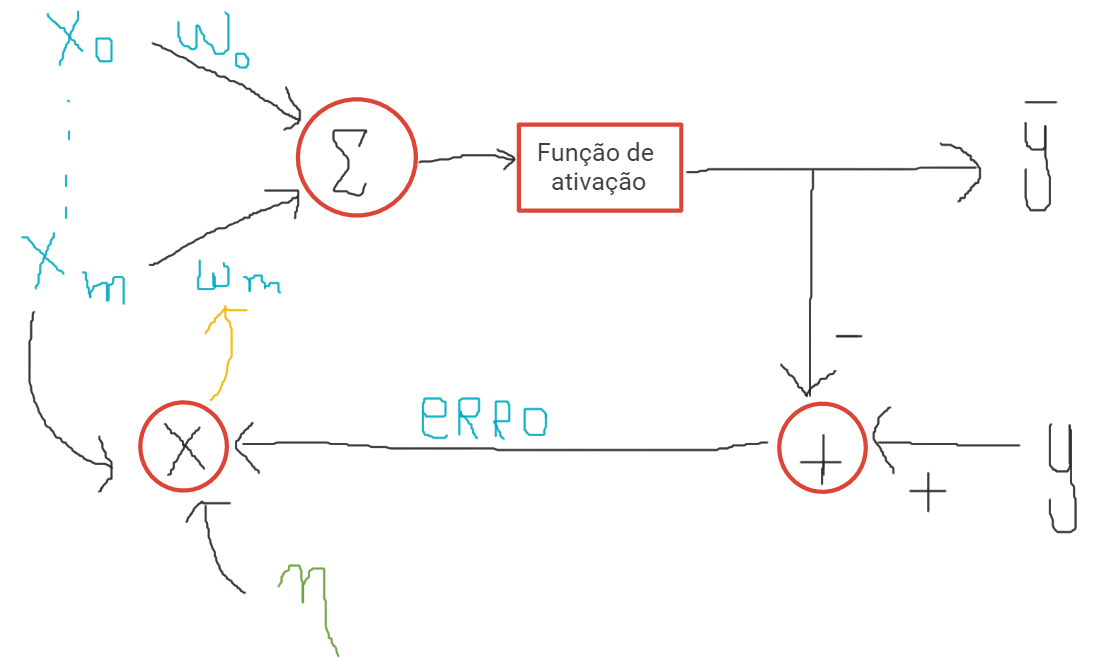

### - AND 

In [3]:
x_treino = []
x_treino.append(np.array([0, 0]))
x_treino.append(np.array([0, 1]))
x_treino.append(np.array([1, 0]))
x_treino.append(np.array([1, 1]))

y_treino = np.array([0, 0, 0, 1])

perceptron = Perceptron(2, 0.01)
perceptron.treinar(x_treino, y_treino)

Iteração:  1
   Erro:  0  | Pesos:  [0. 0. 0.]
   Erro:  0  | Pesos:  [0. 0. 0.]
   Erro:  0  | Pesos:  [0. 0. 0.]
   Erro:  1  | Pesos:  [0.01 0.01 0.01]
Iteração:  2
   Erro:  -1  | Pesos:  [0.   0.01 0.01]
   Erro:  -1  | Pesos:  [-0.01  0.01  0.  ]
   Erro:  0  | Pesos:  [-0.01  0.01  0.  ]
   Erro:  1  | Pesos:  [0.   0.02 0.01]
Iteração:  3
   Erro:  0  | Pesos:  [0.   0.02 0.01]
   Erro:  -1  | Pesos:  [-0.01  0.02  0.  ]
   Erro:  -1  | Pesos:  [-0.02  0.01  0.  ]
   Erro:  1  | Pesos:  [-0.01  0.02  0.01]
Iteração:  4
   Erro:  0  | Pesos:  [-0.01  0.02  0.01]
   Erro:  0  | Pesos:  [-0.01  0.02  0.01]
   Erro:  -1  | Pesos:  [-0.02  0.01  0.01]
   Erro:  1  | Pesos:  [-0.01  0.02  0.02]
Iteração:  5
   Erro:  0  | Pesos:  [-0.01  0.02  0.02]
   Erro:  -1  | Pesos:  [-0.02  0.02  0.01]
   Erro:  0  | Pesos:  [-0.02  0.02  0.01]
   Erro:  0  | Pesos:  [-0.02  0.02  0.01]
Iteração:  6
   Erro:  0  | Pesos:  [-0.02  0.02  0.01]
   Erro:  0  | Pesos:  [-0.02  0.02  0.01]
   Erro: 

In [4]:
x_teste = np.array([0, 0])
perceptron.prever(x_teste) 

0

In [5]:
x_teste = np.array([0, 1])
perceptron.prever(x_teste) 

0

In [6]:
x_teste = np.array([1, 0])
perceptron.prever(x_teste) 

0

In [7]:
x_teste = np.array([1, 1])
perceptron.prever(x_teste) 

1

### - NAND

In [8]:
x_treino = []
x_treino.append(np.array([0, 0]))
x_treino.append(np.array([0, 1]))
x_treino.append(np.array([1, 0]))
x_treino.append(np.array([1, 1]))

y_treino = np.array([1, 1, 1, 0])

perceptron = Perceptron(2, 0.01)
perceptron.treinar(x_treino, y_treino)

Iteração:  1
   Erro:  1  | Pesos:  [0.01 0.   0.  ]
   Erro:  0  | Pesos:  [0.01 0.   0.  ]
   Erro:  0  | Pesos:  [0.01 0.   0.  ]
   Erro:  -1  | Pesos:  [ 0.   -0.01 -0.01]
Iteração:  2
   Erro:  1  | Pesos:  [ 0.01 -0.01 -0.01]
   Erro:  1  | Pesos:  [ 0.02 -0.01  0.  ]
   Erro:  0  | Pesos:  [ 0.02 -0.01  0.  ]
   Erro:  -1  | Pesos:  [ 0.01 -0.02 -0.01]
Iteração:  3
   Erro:  0  | Pesos:  [ 0.01 -0.02 -0.01]
   Erro:  1  | Pesos:  [ 0.02 -0.02  0.  ]
   Erro:  1  | Pesos:  [ 0.03 -0.01  0.  ]
   Erro:  -1  | Pesos:  [ 0.02 -0.02 -0.01]
Iteração:  4
   Erro:  0  | Pesos:  [ 0.02 -0.02 -0.01]
   Erro:  0  | Pesos:  [ 0.02 -0.02 -0.01]
   Erro:  1  | Pesos:  [ 0.03 -0.01 -0.01]
   Erro:  -1  | Pesos:  [ 0.02 -0.02 -0.02]
Iteração:  5
   Erro:  0  | Pesos:  [ 0.02 -0.02 -0.02]
   Erro:  1  | Pesos:  [ 0.03 -0.02 -0.01]
   Erro:  0  | Pesos:  [ 0.03 -0.02 -0.01]
   Erro:  0  | Pesos:  [ 0.03 -0.02 -0.01]
Iteração:  6
   Erro:  0  | Pesos:  [ 0.03 -0.02 -0.01]
   Erro:  0  | Pesos:  [

In [9]:
x_teste = np.array([0, 0])
perceptron.prever(x_teste) 

1

In [10]:
x_teste = np.array([0, 1])
perceptron.prever(x_teste) 

1

In [11]:
x_teste = np.array([1, 0])
perceptron.prever(x_teste) 

1

In [12]:
x_teste = np.array([1, 1])
perceptron.prever(x_teste) 

0

### - OR

In [13]:
x_treino = []
x_treino.append(np.array([0, 0]))
x_treino.append(np.array([0, 1]))
x_treino.append(np.array([1, 0]))
x_treino.append(np.array([1, 1]))

y_treino = np.array([0, 1, 1, 1])

perceptron = Perceptron(2, 0.01)
perceptron.treinar(x_treino, y_treino)

Iteração:  1
   Erro:  0  | Pesos:  [0. 0. 0.]
   Erro:  1  | Pesos:  [0.01 0.   0.01]
   Erro:  0  | Pesos:  [0.01 0.   0.01]
   Erro:  0  | Pesos:  [0.01 0.   0.01]
Iteração:  2
   Erro:  -1  | Pesos:  [0.   0.   0.01]
   Erro:  0  | Pesos:  [0.   0.   0.01]
   Erro:  1  | Pesos:  [0.01 0.01 0.01]
   Erro:  0  | Pesos:  [0.01 0.01 0.01]
Iteração:  3
   Erro:  -1  | Pesos:  [0.   0.01 0.01]
   Erro:  0  | Pesos:  [0.   0.01 0.01]
   Erro:  0  | Pesos:  [0.   0.01 0.01]
   Erro:  0  | Pesos:  [0.   0.01 0.01]
Iteração:  4
   Erro:  0  | Pesos:  [0.   0.01 0.01]
   Erro:  0  | Pesos:  [0.   0.01 0.01]
   Erro:  0  | Pesos:  [0.   0.01 0.01]
   Erro:  0  | Pesos:  [0.   0.01 0.01]


In [14]:
x_teste = np.array([0, 0])
perceptron.prever(x_teste) 

0

In [15]:
x_teste = np.array([0, 1])
perceptron.prever(x_teste) 

1

In [16]:
x_teste = np.array([1, 0])
perceptron.prever(x_teste) 

1

In [17]:
x_teste = np.array([1, 1])
perceptron.prever(x_teste) 

1

### - NOR

In [18]:
x_treino = []
x_treino.append(np.array([0, 0]))
x_treino.append(np.array([0, 1]))
x_treino.append(np.array([1, 0]))
x_treino.append(np.array([1, 1]))

y_treino = np.array([1, 0, 0, 0])

perceptron = Perceptron(2, 0.01)
perceptron.treinar(x_treino, y_treino)

Iteração:  1
   Erro:  1  | Pesos:  [0.01 0.   0.  ]
   Erro:  -1  | Pesos:  [ 0.    0.   -0.01]
   Erro:  0  | Pesos:  [ 0.    0.   -0.01]
   Erro:  0  | Pesos:  [ 0.    0.   -0.01]
Iteração:  2
   Erro:  1  | Pesos:  [ 0.01  0.   -0.01]
   Erro:  0  | Pesos:  [ 0.01  0.   -0.01]
   Erro:  -1  | Pesos:  [ 0.   -0.01 -0.01]
   Erro:  0  | Pesos:  [ 0.   -0.01 -0.01]
Iteração:  3
   Erro:  1  | Pesos:  [ 0.01 -0.01 -0.01]
   Erro:  0  | Pesos:  [ 0.01 -0.01 -0.01]
   Erro:  0  | Pesos:  [ 0.01 -0.01 -0.01]
   Erro:  0  | Pesos:  [ 0.01 -0.01 -0.01]
Iteração:  4
   Erro:  0  | Pesos:  [ 0.01 -0.01 -0.01]
   Erro:  0  | Pesos:  [ 0.01 -0.01 -0.01]
   Erro:  0  | Pesos:  [ 0.01 -0.01 -0.01]
   Erro:  0  | Pesos:  [ 0.01 -0.01 -0.01]


In [19]:
x_teste = np.array([0, 0])
perceptron.prever(x_teste) 

1

In [20]:
x_teste = np.array([0, 1])
perceptron.prever(x_teste) 

0

In [21]:
x_teste = np.array([1, 0])
perceptron.prever(x_teste) 

0

In [22]:
x_teste = np.array([1, 1])
perceptron.prever(x_teste) 

0

### - XOR -> não converge, pois o problema não é linearmente separável

In [23]:
x_treino = []
x_treino.append(np.array([0, 0]))
x_treino.append(np.array([0, 1]))
x_treino.append(np.array([1, 0]))
x_treino.append(np.array([1, 1]))

y_treino = np.array([0, 1, 1, 0])

perceptron = Perceptron(2, 0.01)
perceptron.treinar(x_treino, y_treino)

Iteração:  1
   Erro:  0  | Pesos:  [0. 0. 0.]
   Erro:  1  | Pesos:  [0.01 0.   0.01]
   Erro:  0  | Pesos:  [0.01 0.   0.01]
   Erro:  -1  | Pesos:  [ 0.   -0.01  0.  ]
Iteração:  2
   Erro:  0  | Pesos:  [ 0.   -0.01  0.  ]
   Erro:  1  | Pesos:  [ 0.01 -0.01  0.01]
   Erro:  1  | Pesos:  [0.02 0.   0.01]
   Erro:  -1  | Pesos:  [ 0.01 -0.01  0.  ]
Iteração:  3
   Erro:  -1  | Pesos:  [ 0.   -0.01  0.  ]
   Erro:  1  | Pesos:  [ 0.01 -0.01  0.01]
   Erro:  1  | Pesos:  [0.02 0.   0.01]
   Erro:  -1  | Pesos:  [ 0.01 -0.01  0.  ]
Iteração:  4
   Erro:  -1  | Pesos:  [ 0.   -0.01  0.  ]
   Erro:  1  | Pesos:  [ 0.01 -0.01  0.01]
   Erro:  1  | Pesos:  [0.02 0.   0.01]
   Erro:  -1  | Pesos:  [ 0.01 -0.01  0.  ]
Iteração:  5
   Erro:  -1  | Pesos:  [ 0.   -0.01  0.  ]
   Erro:  1  | Pesos:  [ 0.01 -0.01  0.01]
   Erro:  1  | Pesos:  [0.02 0.   0.01]
   Erro:  -1  | Pesos:  [ 0.01 -0.01  0.  ]
Iteração:  6
   Erro:  -1  | Pesos:  [ 0.   -0.01  0.  ]
   Erro:  1  | Pesos:  [ 0.01 -0.01  

   Erro:  -1  | Pesos:  [ 0.   -0.01  0.  ]
   Erro:  1  | Pesos:  [ 0.01 -0.01  0.01]
   Erro:  1  | Pesos:  [0.02 0.   0.01]
   Erro:  -1  | Pesos:  [ 0.01 -0.01  0.  ]
Iteração:  71
   Erro:  -1  | Pesos:  [ 0.   -0.01  0.  ]
   Erro:  1  | Pesos:  [ 0.01 -0.01  0.01]
   Erro:  1  | Pesos:  [0.02 0.   0.01]
   Erro:  -1  | Pesos:  [ 0.01 -0.01  0.  ]
Iteração:  72
   Erro:  -1  | Pesos:  [ 0.   -0.01  0.  ]
   Erro:  1  | Pesos:  [ 0.01 -0.01  0.01]
   Erro:  1  | Pesos:  [0.02 0.   0.01]
   Erro:  -1  | Pesos:  [ 0.01 -0.01  0.  ]
Iteração:  73
   Erro:  -1  | Pesos:  [ 0.   -0.01  0.  ]
   Erro:  1  | Pesos:  [ 0.01 -0.01  0.01]
   Erro:  1  | Pesos:  [0.02 0.   0.01]
   Erro:  -1  | Pesos:  [ 0.01 -0.01  0.  ]
Iteração:  74
   Erro:  -1  | Pesos:  [ 0.   -0.01  0.  ]
   Erro:  1  | Pesos:  [ 0.01 -0.01  0.01]
   Erro:  1  | Pesos:  [0.02 0.   0.01]
   Erro:  -1  | Pesos:  [ 0.01 -0.01  0.  ]
Iteração:  75
   Erro:  -1  | Pesos:  [ 0.   -0.01  0.  ]
   Erro:  1  | Pesos:  [ 0.01 -

   Erro:  -1  | Pesos:  [ 0.   -0.01  0.  ]
   Erro:  1  | Pesos:  [ 0.01 -0.01  0.01]
   Erro:  1  | Pesos:  [0.02 0.   0.01]
   Erro:  -1  | Pesos:  [ 0.01 -0.01  0.  ]
Iteração:  129
   Erro:  -1  | Pesos:  [ 0.   -0.01  0.  ]
   Erro:  1  | Pesos:  [ 0.01 -0.01  0.01]
   Erro:  1  | Pesos:  [0.02 0.   0.01]
   Erro:  -1  | Pesos:  [ 0.01 -0.01  0.  ]
Iteração:  130
   Erro:  -1  | Pesos:  [ 0.   -0.01  0.  ]
   Erro:  1  | Pesos:  [ 0.01 -0.01  0.01]
   Erro:  1  | Pesos:  [0.02 0.   0.01]
   Erro:  -1  | Pesos:  [ 0.01 -0.01  0.  ]
Iteração:  131
   Erro:  -1  | Pesos:  [ 0.   -0.01  0.  ]
   Erro:  1  | Pesos:  [ 0.01 -0.01  0.01]
   Erro:  1  | Pesos:  [0.02 0.   0.01]
   Erro:  -1  | Pesos:  [ 0.01 -0.01  0.  ]
Iteração:  132
   Erro:  -1  | Pesos:  [ 0.   -0.01  0.  ]
   Erro:  1  | Pesos:  [ 0.01 -0.01  0.01]
   Erro:  1  | Pesos:  [0.02 0.   0.01]
   Erro:  -1  | Pesos:  [ 0.01 -0.01  0.  ]
Iteração:  133
   Erro:  -1  | Pesos:  [ 0.   -0.01  0.  ]
   Erro:  1  | Pesos:  [ 0

   Erro:  1  | Pesos:  [ 0.01 -0.01  0.01]
   Erro:  1  | Pesos:  [0.02 0.   0.01]
   Erro:  -1  | Pesos:  [ 0.01 -0.01  0.  ]
Iteração:  186
   Erro:  -1  | Pesos:  [ 0.   -0.01  0.  ]
   Erro:  1  | Pesos:  [ 0.01 -0.01  0.01]
   Erro:  1  | Pesos:  [0.02 0.   0.01]
   Erro:  -1  | Pesos:  [ 0.01 -0.01  0.  ]
Iteração:  187
   Erro:  -1  | Pesos:  [ 0.   -0.01  0.  ]
   Erro:  1  | Pesos:  [ 0.01 -0.01  0.01]
   Erro:  1  | Pesos:  [0.02 0.   0.01]
   Erro:  -1  | Pesos:  [ 0.01 -0.01  0.  ]
Iteração:  188
   Erro:  -1  | Pesos:  [ 0.   -0.01  0.  ]
   Erro:  1  | Pesos:  [ 0.01 -0.01  0.01]
   Erro:  1  | Pesos:  [0.02 0.   0.01]
   Erro:  -1  | Pesos:  [ 0.01 -0.01  0.  ]
Iteração:  189
   Erro:  -1  | Pesos:  [ 0.   -0.01  0.  ]
   Erro:  1  | Pesos:  [ 0.01 -0.01  0.01]
   Erro:  1  | Pesos:  [0.02 0.   0.01]
   Erro:  -1  | Pesos:  [ 0.01 -0.01  0.  ]
Iteração:  190
   Erro:  -1  | Pesos:  [ 0.   -0.01  0.  ]
   Erro:  1  | Pesos:  [ 0.01 -0.01  0.01]
   Erro:  1  | Pesos:  [0.0

   Erro:  -1  | Pesos:  [ 0.   -0.01  0.  ]
   Erro:  1  | Pesos:  [ 0.01 -0.01  0.01]
   Erro:  1  | Pesos:  [0.02 0.   0.01]
   Erro:  -1  | Pesos:  [ 0.01 -0.01  0.  ]
Iteração:  248
   Erro:  -1  | Pesos:  [ 0.   -0.01  0.  ]
   Erro:  1  | Pesos:  [ 0.01 -0.01  0.01]
   Erro:  1  | Pesos:  [0.02 0.   0.01]
   Erro:  -1  | Pesos:  [ 0.01 -0.01  0.  ]
Iteração:  249
   Erro:  -1  | Pesos:  [ 0.   -0.01  0.  ]
   Erro:  1  | Pesos:  [ 0.01 -0.01  0.01]
   Erro:  1  | Pesos:  [0.02 0.   0.01]
   Erro:  -1  | Pesos:  [ 0.01 -0.01  0.  ]
Iteração:  250
   Erro:  -1  | Pesos:  [ 0.   -0.01  0.  ]
   Erro:  1  | Pesos:  [ 0.01 -0.01  0.01]
   Erro:  1  | Pesos:  [0.02 0.   0.01]
   Erro:  -1  | Pesos:  [ 0.01 -0.01  0.  ]
Iteração:  251
   Erro:  -1  | Pesos:  [ 0.   -0.01  0.  ]
   Erro:  1  | Pesos:  [ 0.01 -0.01  0.01]
   Erro:  1  | Pesos:  [0.02 0.   0.01]
   Erro:  -1  | Pesos:  [ 0.01 -0.01  0.  ]
Iteração:  252
   Erro:  -1  | Pesos:  [ 0.   -0.01  0.  ]
   Erro:  1  | Pesos:  [ 0

   Erro:  1  | Pesos:  [ 0.01 -0.01  0.01]
   Erro:  1  | Pesos:  [0.02 0.   0.01]
   Erro:  -1  | Pesos:  [ 0.01 -0.01  0.  ]
Iteração:  299
   Erro:  -1  | Pesos:  [ 0.   -0.01  0.  ]
   Erro:  1  | Pesos:  [ 0.01 -0.01  0.01]
   Erro:  1  | Pesos:  [0.02 0.   0.01]
   Erro:  -1  | Pesos:  [ 0.01 -0.01  0.  ]
Iteração:  300
   Erro:  -1  | Pesos:  [ 0.   -0.01  0.  ]
   Erro:  1  | Pesos:  [ 0.01 -0.01  0.01]
   Erro:  1  | Pesos:  [0.02 0.   0.01]
   Erro:  -1  | Pesos:  [ 0.01 -0.01  0.  ]
Iteração:  301
   Erro:  -1  | Pesos:  [ 0.   -0.01  0.  ]
   Erro:  1  | Pesos:  [ 0.01 -0.01  0.01]
   Erro:  1  | Pesos:  [0.02 0.   0.01]
   Erro:  -1  | Pesos:  [ 0.01 -0.01  0.  ]
Iteração:  302
   Erro:  -1  | Pesos:  [ 0.   -0.01  0.  ]
   Erro:  1  | Pesos:  [ 0.01 -0.01  0.01]
   Erro:  1  | Pesos:  [0.02 0.   0.01]
   Erro:  -1  | Pesos:  [ 0.01 -0.01  0.  ]
Iteração:  303
   Erro:  -1  | Pesos:  [ 0.   -0.01  0.  ]
   Erro:  1  | Pesos:  [ 0.01 -0.01  0.01]
   Erro:  1  | Pesos:  [0.0

   Erro:  -1  | Pesos:  [ 0.   -0.01  0.  ]
   Erro:  1  | Pesos:  [ 0.01 -0.01  0.01]
   Erro:  1  | Pesos:  [0.02 0.   0.01]
   Erro:  -1  | Pesos:  [ 0.01 -0.01  0.  ]
Iteração:  371
   Erro:  -1  | Pesos:  [ 0.   -0.01  0.  ]
   Erro:  1  | Pesos:  [ 0.01 -0.01  0.01]
   Erro:  1  | Pesos:  [0.02 0.   0.01]
   Erro:  -1  | Pesos:  [ 0.01 -0.01  0.  ]
Iteração:  372
   Erro:  -1  | Pesos:  [ 0.   -0.01  0.  ]
   Erro:  1  | Pesos:  [ 0.01 -0.01  0.01]
   Erro:  1  | Pesos:  [0.02 0.   0.01]
   Erro:  -1  | Pesos:  [ 0.01 -0.01  0.  ]
Iteração:  373
   Erro:  -1  | Pesos:  [ 0.   -0.01  0.  ]
   Erro:  1  | Pesos:  [ 0.01 -0.01  0.01]
   Erro:  1  | Pesos:  [0.02 0.   0.01]
   Erro:  -1  | Pesos:  [ 0.01 -0.01  0.  ]
Iteração:  374
   Erro:  -1  | Pesos:  [ 0.   -0.01  0.  ]
   Erro:  1  | Pesos:  [ 0.01 -0.01  0.01]
   Erro:  1  | Pesos:  [0.02 0.   0.01]
   Erro:  -1  | Pesos:  [ 0.01 -0.01  0.  ]
Iteração:  375
   Erro:  -1  | Pesos:  [ 0.   -0.01  0.  ]
   Erro:  1  | Pesos:  [ 0

   Erro:  1  | Pesos:  [ 0.01 -0.01  0.01]
   Erro:  1  | Pesos:  [0.02 0.   0.01]
   Erro:  -1  | Pesos:  [ 0.01 -0.01  0.  ]
Iteração:  431
   Erro:  -1  | Pesos:  [ 0.   -0.01  0.  ]
   Erro:  1  | Pesos:  [ 0.01 -0.01  0.01]
   Erro:  1  | Pesos:  [0.02 0.   0.01]
   Erro:  -1  | Pesos:  [ 0.01 -0.01  0.  ]
Iteração:  432
   Erro:  -1  | Pesos:  [ 0.   -0.01  0.  ]
   Erro:  1  | Pesos:  [ 0.01 -0.01  0.01]
   Erro:  1  | Pesos:  [0.02 0.   0.01]
   Erro:  -1  | Pesos:  [ 0.01 -0.01  0.  ]
Iteração:  433
   Erro:  -1  | Pesos:  [ 0.   -0.01  0.  ]
   Erro:  1  | Pesos:  [ 0.01 -0.01  0.01]
   Erro:  1  | Pesos:  [0.02 0.   0.01]
   Erro:  -1  | Pesos:  [ 0.01 -0.01  0.  ]
Iteração:  434
   Erro:  -1  | Pesos:  [ 0.   -0.01  0.  ]
   Erro:  1  | Pesos:  [ 0.01 -0.01  0.01]
   Erro:  1  | Pesos:  [0.02 0.   0.01]
   Erro:  -1  | Pesos:  [ 0.01 -0.01  0.  ]
Iteração:  435
   Erro:  -1  | Pesos:  [ 0.   -0.01  0.  ]
   Erro:  1  | Pesos:  [ 0.01 -0.01  0.01]
   Erro:  1  | Pesos:  [0.0

Iteração:  482
   Erro:  -1  | Pesos:  [ 0.   -0.01  0.  ]
   Erro:  1  | Pesos:  [ 0.01 -0.01  0.01]
   Erro:  1  | Pesos:  [0.02 0.   0.01]
   Erro:  -1  | Pesos:  [ 0.01 -0.01  0.  ]
Iteração:  483
   Erro:  -1  | Pesos:  [ 0.   -0.01  0.  ]
   Erro:  1  | Pesos:  [ 0.01 -0.01  0.01]
   Erro:  1  | Pesos:  [0.02 0.   0.01]
   Erro:  -1  | Pesos:  [ 0.01 -0.01  0.  ]
Iteração:  484
   Erro:  -1  | Pesos:  [ 0.   -0.01  0.  ]
   Erro:  1  | Pesos:  [ 0.01 -0.01  0.01]
   Erro:  1  | Pesos:  [0.02 0.   0.01]
   Erro:  -1  | Pesos:  [ 0.01 -0.01  0.  ]
Iteração:  485
   Erro:  -1  | Pesos:  [ 0.   -0.01  0.  ]
   Erro:  1  | Pesos:  [ 0.01 -0.01  0.01]
   Erro:  1  | Pesos:  [0.02 0.   0.01]
   Erro:  -1  | Pesos:  [ 0.01 -0.01  0.  ]
Iteração:  486
   Erro:  -1  | Pesos:  [ 0.   -0.01  0.  ]
   Erro:  1  | Pesos:  [ 0.01 -0.01  0.01]
   Erro:  1  | Pesos:  [0.02 0.   0.01]
   Erro:  -1  | Pesos:  [ 0.01 -0.01  0.  ]
Iteração:  487
   Erro:  -1  | Pesos:  [ 0.   -0.01  0.  ]
   Erro:  1

KeyboardInterrupt: 

## Podemos colocar uma quantidade máxima de iterações como parâmetro da função para fazer uma limitação, de modo que o laço de repetição seja interrompido quando esse valor é atingido.

### As referências deste notebook estão apresentadas a seguir:
### - https://www.asimovinstitute.org/neural-network-zoo/
### - http://deeplearningbook.com.br/